# <span style="color:blue">Programação Python para Ciência de Dados</span>

## <span style="color:blue">Laboratório 4: Numpy parte II, Matplotlib, Pandas parte II</span>
---


Nesse laboratório vamos trabalhar com um conjunto de dados **ESC2013\_RMSP\_CEM.csv** que contém informações sobre escolas de ensino médio de São Paulo.


**0)**

**a)** Carregue os pacotes: `numpy`, `pandas` e `matplotlib` 

In [34]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Utilize esse comando para mostrar mais colunas em um dataset:
pd.set_option('display.max_columns', 50)

# E esse para mostrar plots maiores:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [36]:
# Algumas definições de arquivos
DATA_DIR = "EnsinoMedio/"
schools_file = DATA_DIR + "ESC2013_RMSP_CEM.csv"

**b)** Leio o arquivo definido acima com pandas, armazene em uma variável chamada `schools` e mostre as primeiras 5 linhas do DataFrame:

In [37]:
df = pd.read_csv("EnsinoMedio/ESC2013_RMSP_CEM.csv")
df.head()

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,...,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6921,Medio Alto
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,400,-47146239,-23983873,35036365,35036365,BAIRRO DOS BARNABES,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,413,11,46841155,1,1,0,1,0,1,...,230.40,220.14,4.18,229.93,229.88,4.33,242.32,248.41,4.85,247.08,238.32,4.76,NaN,3.7,4.2,4.5,4.4,NaN,NaN,NaN,NaN,NaN,NaN,47.3253,Medio
4,97,-47141337,-23964408,35913424,35913424,BAIRRO DAS SENHORINHAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,SENHORINHAS,6950000.0,RUA DOS LAGOS,20,11,46812769,1,0,1,0,0,1,...,241.29,226.74,4.47,172.40,170.80,2.39,249.23,244.94,4.90,244.75,231.59,4.61,NaN,4.2,2.3,4.7,4.4,451.33,469.34,480.52,485.11,444.71,469.92,49.3778,Medio


Esse dataset contêm diversas informações sobre escolas de ensino médio na região metropolitana de São Paulo. Para saber o que cada coluna significa, refira-se ao arquivo `DicionarioESC.pdf`.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10937 entries, 0 to 10936
Columns: 136 entries, ID to INSE_CL
dtypes: float64(90), int64(36), object(10)
memory usage: 11.3+ MB


**1)** 

**a)** Existem muitos valores faltantes na conjunto de dados? Se sim, imprima a coluna com mais valores faltantes e o número de valores faltantes em tal coluna.

**DICA**: Utilize os métodos do _pandas_ [.isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html), [.idxmax()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) (que retorna o indíce de uma série onde o valor máximo ocorre) e o método .max().

In [76]:
# Procurando o índice da coluna com mais valores faltantes
print(df.isna().sum().idxmax()) 
# Salvando em uma variável
index_col_mais_faltante = df.isna().sum().idxmax()
# Imprimindo
#print(df[index_col_mais_faltante]);
# Calculando o número de valores faltantes
N_faltantes = sum(df[index_col_mais_faltante].isna())
print('Número de valores faltantes: {}'.format(N_faltantes))
# Calculando o número total de valores na coluna
N_total = df[index_col_mais_faltante].shape[0]
# Calculando a porcentagem de dados faltantes na coluna
print("Percentual de valores faltantes: {}%".format(100*(N_faltantes/N_total)))

COD_SC
Número de valores faltantes: 10937
Percentual de valores faltantes: 100.0%


**b)** Quantas colunas possuem 1 ou mais valores nulo?
R: 96

In [124]:
sum(df.isnull().sum() >= 1)

96

**c)** Existem entradas duplicadas no conjunto de dados?

In [77]:
sum(df.duplicated())
print("Não existem entradas duplicadas")

Não existem entradas duplcadas


**2)**

**a)** Faça um plot onde cada escola é um ponto, com o eixo X represetando a longitude e o eixo y a lattitude onde a escola está localizada (colunas "LONGITUDE" e "LATITUDE" do DataFrame).

In [78]:
df.columns

Index(['ID', 'LONGITUDE', 'LATITUDE', 'CODESC', 'CODESCTX', 'NOMEESC',
       'NOMEMUN', 'CODMUN', 'NOMDIST', 'CODDIST',
       ...
       'IDEB11AF', 'IDEB13AF', 'RED_EN13', 'LC_EN13', 'MAT_EN13', 'CH_EN13',
       'CN_EN13', 'ENEM2013', 'INSE_AB', 'INSE_CL'],
      dtype='object', length=136)

In [79]:
print(df["LONGITUDE"][:5])
print(df["LATITUDE"][:5])

0   -47143986
1   -47145545
2   -47145560
3   -47146239
4   -47141337
Name: LONGITUDE, dtype: int64
0   -23986886
1   -23985717
2   -23985685
3   -23983873
4   -23964408
Name: LATITUDE, dtype: int64


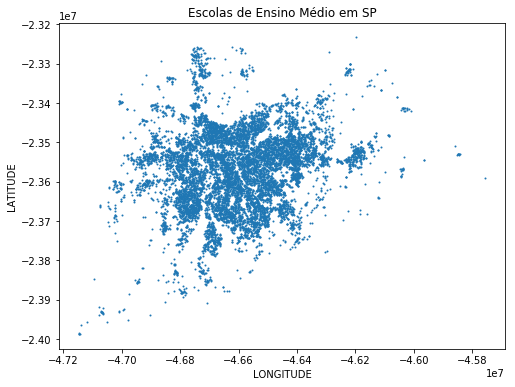

In [80]:
plt.figure(figsize=(8,6))
plt.scatter(df["LONGITUDE"], df["LATITUDE"],s=1);
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.title('Escolas de Ensino Médio em SP');

Observe que existe uma escola cuja longitude é maior que todas as outras.

**b)** Repita o plot acima, mas indicando com uma seta a escola com maior longitude. Sem utilizar o método .max, qual o nome (coluna `NOMEESC`) dessa escola?

**DICA**: No python, podemos usar a notação `3.4e7` para representar o número $ 3.4^{10}$. 

In [97]:
df[df["LONGITUDE"]== df["LONGITUDE"].max()]

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,...,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL
10936,11428,-45756429,-23591099,35249191,35249191,ANTONIO RODRIGUES DOS SANTOS EMEF,SALESOPOLIS,3545001,SALESOPOLIS,354500105.0,NaN,3,Municipal,NASCENTE DO TIETE,8970000.0,ESTRADA DA PETROBRAS,S/N,11,46961863,2,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
nome_escola = df[df["LONGITUDE"]== df["LONGITUDE"].max()]['NOMEESC'].iloc[0]
print(nome_escola)

ANTONIO RODRIGUES DOS SANTOS EMEF


In [100]:
max_long = df["LONGITUDE"].max()
max_long_lat = df[df["LONGITUDE"]== df["LONGITUDE"].max()]['LATITUDE'].iloc[0]
print(max_long)
print(max_long_lat)

-45756429
-23591099


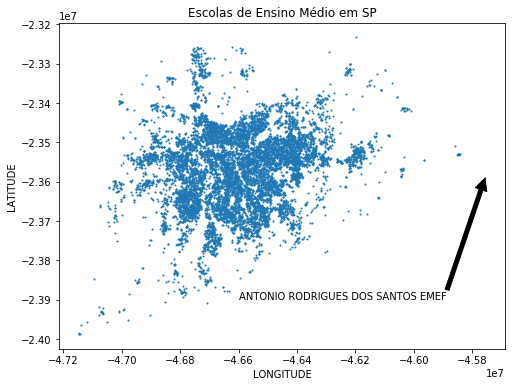

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(df["LONGITUDE"], df["LATITUDE"],s=1);
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.title('Escolas de Ensino Médio em SP');
plt.annotate(nome_escola, xy=(max_long, max_long_lat), xytext=(-4.66e7,-2.39e7), 
             arrowprops=dict(facecolor='k'));

**3)**

A coluna `COD_DEP` representa o código da dependência administrativa da escola (1 - Federal, 2 - Estadual, 3 - Municipal, 4 - Privada).

Faça um gráfico de barras mostrando a quantidade de escolas em cada uma das categorias.

**DICA**: Utilize o método `.value_counts()` do Pandas e `.bar()` do matplotlib

O Pandas também oferece recursos para visualização que muitas vezes são mais simples de utilizar. Por exemplo, o exemplo acima se resume a uma linha de código utilizando o comando`.hist()` do pandas.

In [117]:
df['COD_DEP'].value_counts()

4    5225
3    3405
2    2303
1       4
Name: COD_DEP, dtype: int64

In [118]:
list(df['COD_DEP'].value_counts())

[5225, 3405, 2303, 4]

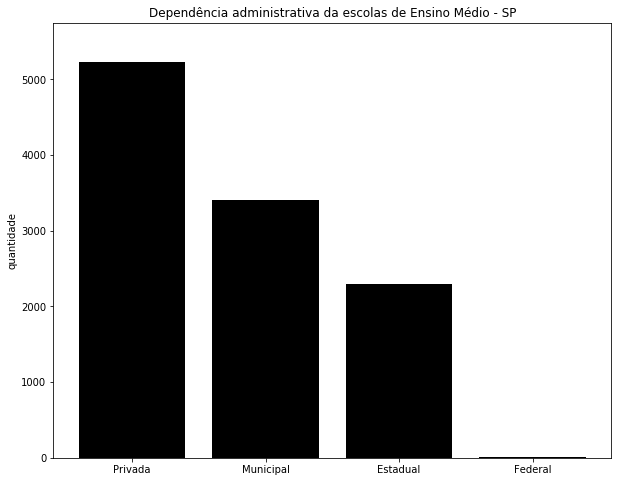

In [123]:
# dataset
height = list(df['COD_DEP'].value_counts())
bars = ('Privada','Municipal','Estadual','Federal')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height,color = 'k')
 
# Add title and axis names
plt.title('Dependência administrativa da escolas de Ensino Médio - SP')
plt.ylabel('quantidade')
 
# Limits for the Y axis
plt.ylim(0,1.1*max(height))
 
# Create names
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()


## Dados faltantes

Vamos exercitar algumas alternativas para tratar dados faltantes

**4)**

**a)** O conjunto de dados **ESC2013_RMSP_CEM.csv** possui muitos dados faltantes. Se adotarmos a estratégia de remover todas as linhas que possui 1 ou mais valores faltantes, qual a porcentagem dos dados que será removida? R: 100%

In [101]:
df.dropna()

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,...,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL


**b)** Remover linhas com valores faltantes não é uma alternativa viável. Vamos tentar outra abordagem:

- Considere apenas as **colunas** que possuem menos que 7656 (cerca de 70% do nosso conjunto de dados) de nulos.
- Elimine todas as linhas em que aparecem 1 ou mais valores faltantes essas colunas.
- Qual a porcentagem de dados que restam no DataFrame?

In [189]:
# Calcula 70% das linhas do dataframe
#print(round(df.shape[0]*0.7))
# Novo dataframe retirandoas colunas onde as linhas tinham mais de 70% de NaN
df_1 = df.dropna(thresh = round(df.shape[0]*0.7), axis = 1)

df_2 = df_1.dropna()

itens_df_2 = df_2.shape[0]*df_2.shape[1]
itens_df = df.shape[0]*df.shape[1]

print('porcentagem de dados que restam no DataFrame:{0:10.1f}%'.format(100*itens_df_2/itens_df))

porcentagem de dados que restam no DataFrame:      31.1%


**c)** Vamos considerar uma 3 abordagem:

- Preencha os valores faltantes das colunas com mais que 7656 faltantes com a moda dos valores da coluna.
- Salve esse resultado em um DataFrame chamado "schools_filled"

**Dica**: Utilize o método `.mode()` do Pandas. Note que a função da moda pode retornar vários valores caso haja um empate para a moda.

R: usar fillna()

In [207]:
df_filled = df.fillna(value = df.mode())


---


## Utilizando mais dados

Vamos agora incluir mais um arquivo na análise:

In [ ]:
# Algumas definições de arquivos
ENEM_FILE = DATA_DIR + "ENEM2015.csv"

**5)**

**a)** Leio o arquivo definido acima com pandas, armazene em um DataFrame chamado `enem` e mostre suas primeiras 5 linhas:

In [209]:
enem = pd.read_csv("EnsinoMedio/ENEM2015.csv")
enem.head()

,CODIGO DA ENTIDADE,NUMERO DE PARTICIPANTES,Classificacao
0,35000139,142,1
1,35000140,79,1
2,35000267,131,2
3,35000280,146,1
4,35000334,95,1


**b)** Junte o DataFrame `enem` com o dataframe `schools_filled`, utilizando as colunas "CODESC" e "Código da Entidade" como chave, através da função [**.merge**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).

Utilize a estratégia de só incluir os exemplos quando aparece em ambos os DataFrames.

In [216]:
# No dataframe enem, mudar o nome da coluna CODIGO DA ENTIDADE para CODESC:
enem.rename(columns = {'CODIGO DA ENTIDADE':'CODESC'}, inplace = True)
enem.head()

,CODESC,NUMERO DE PARTICIPANTES,Classificacao
0,35000139,142,1
1,35000140,79,1
2,35000267,131,2
3,35000280,146,1
4,35000334,95,1


In [219]:
df_merged = pd.merge(df_filled, enem, how = 'inner', on = 'CODESC')
df_merged.head()

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,...,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL,NUMERO DE PARTICIPANTES,Classificacao
0,94,-47065439,-23935534,35325983,35325983,TALES DE MILETO COLEGIO,JUQUITIBA,3526209,JUQUITIBA,352620905.0,NaN,4,Privada,CENTRO,6950000.0,RUA BRIGADEIRO JOSE VICENTE FARIA,102,11,46812025,1,1,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549.09,535.24,628.28,586.51,537.21,571.81,60.7539,Alto,13,2
1,11449,-46992707,-23924130,35044891,35044891,BAIRRO DAS PALMEIRAS,JUQUITIBA,3526209,JUQUITIBA,352620905.0,NaN,2,Estadual,DAS PALMEIRAS,6950000.0,BR 116 KM 317,125,11,46839300,1,0,1,0,0,1,...,4.40,231.07,230.75,4.36,266.38,245.70,5.20,266.77,250.48,5.29,NaN,3.6,4.1,5.0,5.2,NaN,NaN,NaN,NaN,NaN,533.83,49.3944,Medio,17,1
2,411,-46947603,-23856125,35080615,35080615,ANDRE FRANCO MONTORO GOVERNADOR,SAO LOURENCO DA SERRA,3549953,SAO LOURENCO DA SERRA,354995305.0,NaN,2,Estadual,CENTRO,6890000.0,R JOAO ALFREDO DE MORAES,300,11,46863898,1,1,1,0,0,1,...,4.54,234.56,229.91,4.41,254.95,245.88,5.01,258.06,243.58,5.03,NaN,3.9,4.1,4.6,4.7,507.06,499.38,515.25,506.74,461.89,495.81,52.0052,Medio Alto,46,1
3,414,-46944077,-23851892,35010017,35010017,MARIANINHA QUEIROZ PROFESSORA,SAO LOURENCO DA SERRA,3549953,SAO LOURENCO DA SERRA,354995305.0,NaN,2,Estadual,CENTRO,6890000.0,PRACA DEZ DE AGOSTO,35,11,46861205,1,1,1,0,0,1,...,4.55,239.85,243.71,4.73,250.93,246.18,4.95,243.95,240.02,4.73,NaN,4.1,4.2,4.4,4.3,533.93,480.75,503.80,498.01,477.03,489.90,50.5632,Medio Alto,72,2
4,423,-47022685,-23686029,35908551,35908551,SIDRONIA NUNES PIRES,COTIA,3513009,CAUCAIA DO ALTO,351300910.0,NaN,2,Estadual,CENTRO CAUCAIA DO ALTO,6725105.0,AV INOCENCIO PIRES DE OLIVEIRA,405,11,46110520,1,1,1,0,0,1,...,5.22,264.81,261.69,5.44,253.74,253.70,5.12,259.26,249.14,5.14,NaN,4.7,5.0,4.7,4.7,560.43,507.91,533.63,520.47,467.07,507.27,54.6762,Medio Alto,126,2


**c)** Quais são os possíveis valores na coluna "INSE_CL" (Classificação do Indicador de Nível Socioeconômico) ?

In [222]:
df_merged['INSE_CL'].unique()

array(['Alto', 'Medio', 'Medio Alto', nan, 'Muito Alto'], dtype=object)

**d)** Troque os valores categóricos pelos valores: Medio = 0, Medio Alto = 1, Alto = 2, Muito Alto = 3

Substitua a coluna original.

In [223]:
df_merged.replace({'Alto':2, 'Medio':0, 'Medio Alto':1, 'Muito Alto':3}, inplace = True)

In [227]:
df_merged['INSE_CL']

0       2.0
1       0.0
2       1.0
3       1.0
4       1.0
5       NaN
6       2.0
7       1.0
8       2.0
9       3.0
10      1.0
11      3.0
12      1.0
13      3.0
14      1.0
15      1.0
16      2.0
17      2.0
18      2.0
19      3.0
20      2.0
21      1.0
22      1.0
23      3.0
24      1.0
25      1.0
26      2.0
27      1.0
28      3.0
29      3.0
       ... 
1213    3.0
1214    3.0
1215    1.0
1216    1.0
1217    3.0
1218    2.0
1219    2.0
1220    1.0
1221    2.0
1222    3.0
1223    3.0
1224    2.0
1225    3.0
1226    3.0
1227    2.0
1228    2.0
1229    3.0
1230    3.0
1231    3.0
1232    3.0
1233    3.0
1234    2.0
1235    2.0
1236    1.0
1237    2.0
1238    1.0
1239    NaN
1240    1.0
1241    2.0
1242    1.0
Name: INSE_CL, Length: 1243, dtype: float64